In [1]:
import pandas as pd
from collections import Counter
import datetime
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

warnings.filterwarnings('ignore')

In [2]:
data1_in = pd.read_csv('../Data/data1/data1.csv')
data2_in = pd.read_csv('../Data/data2/data2.csv')
data3_in = pd.read_csv('../Data/data3/data3.csv')

In [3]:
cates = pd.Categorical(data3_in['device_type'])
categories = cates.categories
data3_in['device_type'] = cates.codes
data1_in['device_type'] = data1_in['device_type'].apply(lambda x:categories.get_loc(x))
data2_in['device_type'] = data2_in['device_type'].apply(lambda x:categories.get_loc(x))

In [5]:
day_cnt = data1_in.groupby('register_day').apply(lambda x:x.shape[0])

In [6]:
day_cnt

register_day
1     1200
2     1158
3     1224
4     1167
5     1324
6     1863
7     1708
8     1231
9     1179
10    1401
11    1462
12    1658
13    2157
14    2053
15    1557
dtype: int64

TypeError: 'AxesSubplot' object is not subscriptable

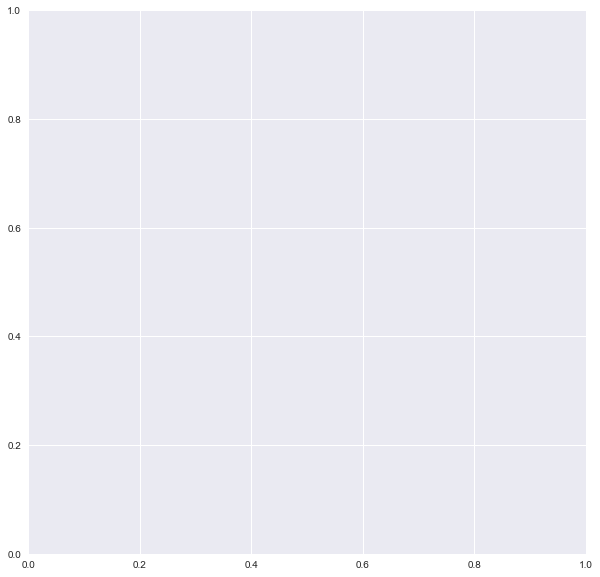

In [10]:
sns.set( palette="muted", color_codes=True)
f , axes= plt.subplots(1,1, figsize=(10,10), sharex=True)
sns.distplot(day_cnt, kde=False, color='b', ax=axes[0,0])
plt.show()

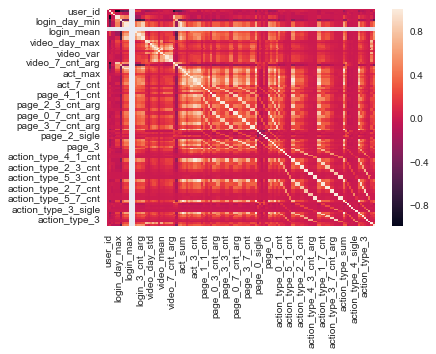

In [12]:
# 热点图，分析特征相关性
corr = data1_in.corr()
sns.heatmap(corr)
plt.show()

In [3]:
def visualData(data, colName):
    plt.figure()
    x = data['label'].groupby(data[colName]).mean().index
    y = data['label'].groupby(data[colName]).mean().get_values()
    m = data['label'].groupby(data[colName]).mean().median()
    plt.plot(x,y)
    plt.hlines(m,x.min(),x.max())

In [ ]:
# deal device_type
plt.plot(list(Counter(a).keys())[2:-7], list(Counter(a).values())[2:-7])
def mapDeviceType():
    con_data = pd.concat([data1_in, data2_in])
    index = con_data['label'].groupby(con_data["device_type"]).mean().index
    values = con_data['label'].groupby(con_data["device_type"]).mean().get_values()
    return index[values>0.5]

In [4]:
data1_in.columns

Index(['user_id', 'register_day', 'register_type', 'device_type',
       'login_day_max', 'login_day_min', 'login_day_std', 'login_cnt',
       'login_sum', 'login_max', 'login_arg', 'login_last_cnt',
       'login_week_cnt', 'login_week_arg_cnt', 'video_day_max',
       'video_day_min', 'video_day_std', 'video_cnt', 'video_sum', 'video_max',
       'video_arg', 'video_last_cnt', 'video_week_cnt', 'video_week_arg_cnt',
       'act_day_max', 'act_day_min', 'act_day_std', 'act_cnt', 'act_sum',
       'act_max', 'act_arg', 'act_last_cnt', 'act_week_cnt',
       'act_week_arg_cnt', 'page_0', 'page_1', 'page_2', 'page_3', 'page_4',
       'action_type_0', 'action_type_1', 'action_type_2', 'action_type_3',
       'action_type_4', 'action_type_5', 'is_author', 'label'],
      dtype='object')

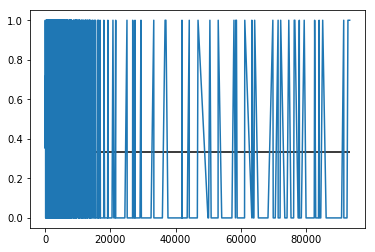

In [9]:
visualData(data2_in, 'device_type')

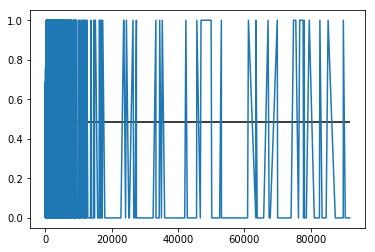

In [10]:
visualData(data1_in, 'device_type')

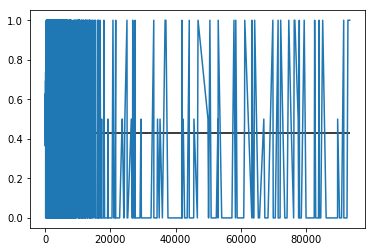

In [11]:
visualData(pd.concat([data1_in, data2_in]), 'device_type')

In [ ]:
def registertypeMap(value):
    if value < 2 or value==6 or value == 9:
        return 2
    elif value == 3 or value == 5

def fenduanData(data):
    data['register_type_fenduan'] = data['register_type'].apply(lambda x:)

In [7]:
set(data1_in['register_type'])

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11}

In [18]:
data2_in[data2_in.register_type == 2].shape[0]

6000

In [ ]:
Counter(data2_in['device_type'])

___________________________________________

In [25]:
ref_user = pd.read_csv('../Output/0623/114_8024099_24712_404_820083.csv', header=None)

In [32]:
cmp_user = pd.read_csv('../Output/0624_126_80767_24746_4.csv', header=None)

In [33]:
len(set(cmp_user[0]).intersection(set(ref_user[0])))

24371

In [34]:
def error_num(file_name1,file_name2):
    compare = pd.read_csv(file_name1, header=None)
    compare2 = pd.read_csv(file_name2, header=None)
    compare = set(compare[0].values)
    compare2 = set(compare2[0].values)
    pd_f1 = len(compare.intersection(compare2))
    print('Compare result:' + str(pd_f1))
    return pd_f1

In [37]:
error_num('../Output/0623/114_8024099_24712_404_820083.csv', '../Output/0624_122_80156_24954_4.csv')

Compare result:24519


24519